In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')


# File to Load 
mouse_drug_data= "data/mouse_drug_data.csv"
clinical_trial_data = "data/clinicaltrial_data.csv"
mouse_drugdata=pd.read_csv(mouse_drug_data)

#combine data into single dataset
mousde_drugdata=pd.read_csv(mouse_drug_data)
clinical_trialdata=pd.read_csv(clinical_trial_data)
drug_trials=pd.merge(clinical_trialdata,mouse_drugdata,on=["Mouse ID","Mouse ID"],how="left")

#Display data table for preview
drug_trials.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [2]:
#Tumor response to treatment
tumor_response_df=drug_trials[["Drug","Timepoint","Tumor Volume (mm3)"]]
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint
grouped_response=tumor_response_df.groupby(["Drug","Timepoint"],as_index=False)["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
tumor_response=pd.DataFrame(grouped_response)
# Preview DataFrame
tumor_response.reset_index
tumor_response.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_response_df=drug_trials[["Drug","Timepoint","Tumor Volume (mm3)"]]
grouped_tumor_vol=tumor_response_df.groupby(["Drug","Timepoint"])["Tumor Volume (mm3)"]
grouped_tumor_sem=grouped_tumor_vol.sem()
# Convert to DataFrame
tumor_stderror_df=pd.DataFrame(grouped_tumor_sem)

# Preview DataFrame
tumor_stderror_df.reset_index(inplace=True)
tumor_stderror_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
pivot_tumor_response=tumor_response.pivot(index="Timepoint",columns="Drug",values="Tumor Volume (mm3)")

# Preview that Reformatting worked

pivot_tumor_response.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Generate the Plot (with Error Bars)


pivot_tumor_response.reset_index(level = None, inplace = True)

Specific_drugs_table=pivot_tumor_response[["Timepoint","Capomulin","Infubinol","Ketapril","Placebo"]]
Specific_drugs_table

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,47.125589
2,10,43.084291,49.403909,49.582269,49.423329
3,15,42.064317,51.296397,52.399974,51.359742
4,20,40.716325,53.197691,54.920935,54.364417
5,25,39.939528,55.715252,57.678982,57.482574
6,30,38.769339,58.299397,60.994507,59.809063
7,35,37.816839,60.742461,63.371686,62.420615
8,40,36.958001,63.162824,66.068580,65.052675
9,45,36.236114,65.755562,70.662958,68.084082


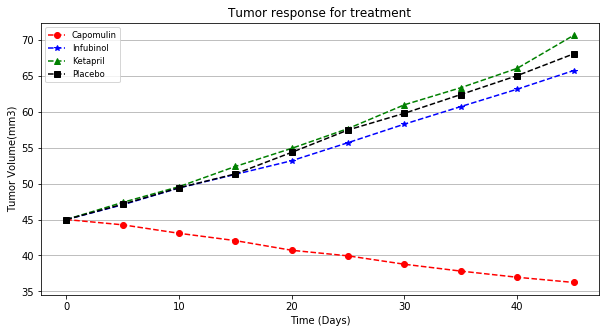

In [6]:
plt.figure(figsize=(10,5))
plt.errorbar(x=Specific_drugs_table["Timepoint"],y=Specific_drugs_table["Capomulin"],
             yerr=None,linestyle="--",fmt="o",label="Capomulin",color="red")
plt.errorbar(x=Specific_drugs_table["Timepoint"],y=Specific_drugs_table["Infubinol"],
             yerr=None,linestyle="--",fmt="*",label="Infubinol",color="blue")
plt.errorbar(x=Specific_drugs_table["Timepoint"],y=Specific_drugs_table["Ketapril"],
             yerr=None,linestyle="--",fmt="^",label="Ketapril",color="green")
plt.errorbar(x=Specific_drugs_table["Timepoint"],y=Specific_drugs_table["Placebo"],
             yerr=None,linestyle="--",fmt="s",label="Placebo",color="black")
plt.ylabel("Tumor Volume(mm3)")
plt.xlabel("Time (Days)")
plt.title("Tumor response for treatment")
plt.legend(loc="best", fontsize="small", fancybox=True)      
plt.grid(axis="y")

# Save the Figure
plt.savefig('tumor_response.png')
# Show the Figure

plt.show()


In [7]:
#METASTATIC RESPONSE TO TREATMENT 
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
metastatic_response_df=drug_trials[["Drug","Timepoint","Metastatic Sites"]]
grouped_metastatic=metastatic_response_df.groupby(["Drug","Timepoint"],as_index=False)["Metastatic Sites"].mean()
                    
# Convert to DataFrame
metastatic_df=pd.DataFrame(grouped_metastatic)
# Preview DataFrame
metastatic_df.reset_index(inplace=True)
metastatic_df.head()

,index,Drug,Timepoint,Metastatic Sites
0,0,Capomulin,0,0.000000
1,1,Capomulin,5,0.160000
2,2,Capomulin,10,0.320000
3,3,Capomulin,15,0.375000
4,4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastatic_response_df=drug_trials[["Drug","Timepoint","Metastatic Sites"]]
grouped_metastatic=metastatic_response_df.groupby(["Drug","Timepoint"])["Metastatic Sites"]
grouped_std_error=grouped_metastatic.sem()
# Convert to DataFrame
metastatic_stderror_df=pd.DataFrame(grouped_std_error)
# Preview DataFrame
metastatic_stderror_df.reset_index
metastatic_stderror_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [9]:

# Minor Data Munging to Re-Format the Data Frames
pivot_meta_response=metastatic_df.pivot(index="Timepoint",columns="Drug",values="Metastatic Sites")

# Preview that Reformatting worked

pivot_meta_response.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
pivot_meta_response.reset_index(level = None, inplace = True)

Specific_drugs_meta_table=pivot_meta_response[["Timepoint","Capomulin","Infubinol","Ketapril","Placebo"]]
Specific_drugs_meta_table

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Placebo
0,0,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.375000
2,10,0.320000,0.666667,0.590909,0.833333
3,15,0.375000,0.904762,0.842105,1.250000
4,20,0.652174,1.050000,1.210526,1.526316
5,25,0.818182,1.277778,1.631579,1.941176
6,30,1.090909,1.588235,2.055556,2.266667
7,35,1.181818,1.666667,2.294118,2.642857
8,40,1.380952,2.100000,2.733333,3.166667
9,45,1.476190,2.111111,3.363636,3.272727


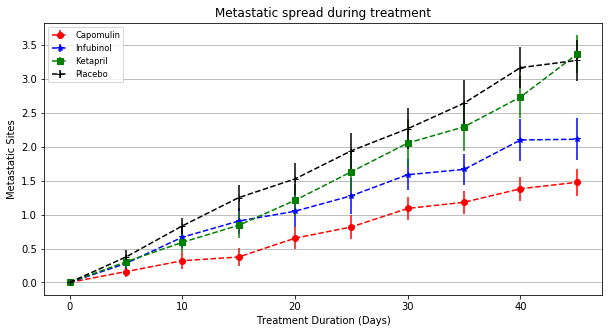

In [11]:
# Generate the Plot (with Error Bars)

plt.figure(figsize=(10,5))
plt.errorbar(x=Specific_drugs_table["Timepoint"],y=Specific_drugs_meta_table["Capomulin"],
             yerr=metastatic_stderror_df.loc["Capomulin", "Metastatic Sites"],linestyle="--",fmt="o",label="Capomulin",color="red")
plt.errorbar(x=Specific_drugs_table["Timepoint"],y=Specific_drugs_meta_table["Infubinol"],
             yerr=metastatic_stderror_df.loc["Infubinol", "Metastatic Sites"],linestyle="--",fmt="*",label="Infubinol",color="blue")
plt.errorbar(x=Specific_drugs_table["Timepoint"],y=Specific_drugs_meta_table["Ketapril"],
             yerr=metastatic_stderror_df.loc["Ketapril", "Metastatic Sites"],linestyle="--",fmt="s",label="Ketapril",color="green")
plt.errorbar(x=Specific_drugs_table["Timepoint"],y=Specific_drugs_meta_table["Placebo"],
             yerr=metastatic_stderror_df.loc["Placebo", "Metastatic Sites"],linestyle="--",fmt="+",label="Placebo",color="black")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatment Duration (Days)")
plt.title("Metastatic spread during treatment")
plt.legend(loc="best", fontsize="small", fancybox=True)      
plt.grid(axis="y")

# Save the Figure
plt.savefig('Metastatic_spread.png')
# Show the Figure

plt.show()


In [12]:
#Survival rates

# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

survival_response_df=drug_trials[["Drug","Timepoint","Mouse ID"]]
survival_response=survival_response_df.groupby(["Drug","Timepoint"],as_index=False)["Mouse ID"].count()
                    
# Convert to DataFrame
survival_df=pd.DataFrame(survival_response)
survival_df=survival_df.rename(columns ={"Mouse ID":"Mouse Count"})
survival_df.head()
# Preview DataFrame





,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [13]:
# Minor Data Munging to Re-Format the Data Frames
survival_response=survival_df.pivot(index="Timepoint",columns="Drug",values="Mouse Count")

# Preview that Reformatting worked

survival_response.head()
# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


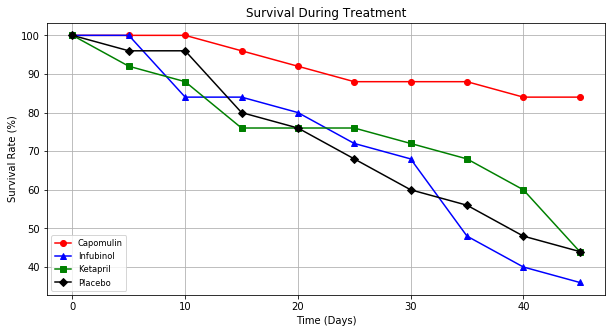

In [14]:
# Generate the Plot (Accounting for percentages)

x_axis = [0,5,10,15,20,25,30,35,40,45]

plt.figure(figsize=(10,5))

cap3 = plt.errorbar(x_axis,(survival_response["Capomulin"]/25*100),linestyle="-",fmt="o",label="Capomulin" ,color = "red")
infu3 = plt.errorbar(x_axis,(survival_response["Infubinol"]/25*100),linestyle="-",fmt="^", label="Infubinol",color = "blue")
keta3 = plt.errorbar(x_axis,(survival_response["Ketapril"]/25*100),linestyle="-",fmt="s", label="Ketapril",color ="green")
plac3 = plt.errorbar(x_axis,(survival_response["Placebo"]/25*100),linestyle="-",fmt="D",label="Placebo",color ="black")

#plt.ylim(40, 100)
#plt.xlim(0, 45)

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")
plt.legend(loc="lower left", fontsize="small", fancybox=True)      

plt.grid()

# Save the Figure
plt.savefig('Survival_rate.png')

# Show the Figure

plt.show()










In [54]:
#Summary Bar Graph
# Calculate the percent changes for each drug
percentage_change = ((pivot_tumor_response.iloc[-1]-(pivot_tumor_response.iloc[0]))/45)*100


# Display the data to confirm

percentage_change



Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

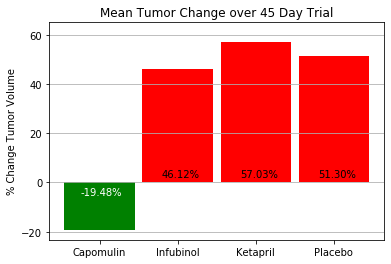

In [70]:
# Store all Relevant Percent Changes into a Tuple
drugList = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]
percent_change = pd.DataFrame(round(percentage_change,2))
percent_change = percent_change.rename(columns = {0 : "Percent Change"})
percent_change["Pass"] = (percent_change < 0)


fig, ax4 = plt.subplots()
x = 0

for drug in drugList:
    y = percent_change.loc[drug, "Percent Change"]
    if percent_change.loc[drug, "Pass"] == True:
        ax4.bar(drug, y, width = .9, color = "g")
        plt.text(x-.25, -5, '{:.2f}%'.format(y), color = "white")
    else:
        ax4.bar(drug, y, width = .9, color = "r")
        plt.text(x-.2, 2, '{:.2f}%'.format(y), color = "black")
    x = 1 + x
plt.yticks((-20, 0, 20, 40, 60))
ax4.yaxis.grid()
plt.title("Mean Tumor Change over 45 Day Trial")
plt.ylabel("% Change Tumor Volume")
plt.ylim(ymax = 65)





# Save the Figure
plt.savefig("MeanTumorChange.png")

# Show the Figure
plt.show()
